In [1]:
import os
import pandas as pd
import numpy as np  
from fancyimpute import KNN 
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import register_matplotlib_converters
import datetime as dt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN
from scipy.stats import chi2_contingency
from patsy import dmatrices
import itertools
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
import warnings
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
os.chdir("C:/Users/levi0/Downloads")

# TRYING TIME SERIES

In [3]:
bike_rental = pd.read_csv("day.csv", usecols = ['dteday', 'mnth', 'cnt'])

In [4]:
bike_rental.head(3)

,dteday,mnth,cnt
0,2011-01-01,1,985
1,2011-01-02,1,801
2,2011-01-03,1,1349


In [5]:
bike_rental['dteday'] = pd.to_datetime(bike_rental.dteday)

In [6]:
d1 = '2011-01-01'

In [7]:
d1 = pd.to_datetime(d1)

In [8]:
bike_rental['age'] = bike_rental.dteday.dt.year*12 + bike_rental.dteday.dt.month - \
                      (d1.year*12 + d1.month)

In [9]:
bike_rental.set_index('age', inplace=True)

In [10]:
bike_rental.head(3)

,dteday,mnth,cnt
age,,,
0,2011-01-01,1,985
0,2011-01-02,1,801
0,2011-01-03,1,1349


In [11]:
bike_rental = pd.DataFrame({'Counts' : bike_rental.groupby('age')['cnt'].sum()}).reset_index()

In [12]:
bike_rental

,age,Counts
0,0,38189
1,1,48215
2,2,64045
3,3,94870
4,4,135821
5,5,143512
6,6,141341
7,7,136691
8,8,127418
9,9,123511


In [13]:
bike_rental['date'] = ['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12']

In [14]:
bike_rental['date'] = pd.to_datetime(bike_rental.date)

In [15]:
type(bike_rental.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
bike_rental.set_index('date', inplace=True)

In [17]:
bike_rental = bike_rental.drop(['age'], axis=1)

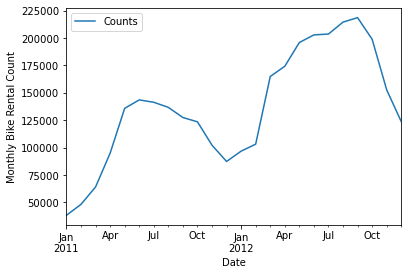

<Figure size 432x288 with 0 Axes>

In [18]:
bike_rental.plot()
plt.ylabel('Monthly Bike Rental Count')
plt.xlabel('Date')
plt.show()
plt.savefig("count.png")

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(bike_rental, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

print(result.observed)

date
2011-01-01              NaN
2011-02-01              NaN
2011-03-01              NaN
2011-04-01              NaN
2011-05-01              NaN
2011-06-01              NaN
2011-07-01    106031.708333
2011-08-01    110759.916667
2011-09-01    117249.583333
2011-10-01    124757.250000
2011-11-01    130565.500000
2011-12-01    135538.916667
2012-01-01    140604.916667
2012-02-01    146441.500000
2012-03-01    153481.791667
2012-04-01    160418.666667
2012-05-01    165661.458333
2012-06-01    169281.750000
2012-07-01              NaN
2012-08-01              NaN
2012-09-01              NaN
2012-10-01              NaN
2012-11-01              NaN
2012-12-01              NaN
Name: trend, dtype: float64
date
2011-01-01   -43472.003472
2011-02-01   -42915.586806
2011-03-01    11782.121528
2011-04-01    14194.246528
2011-05-01    30592.454861
2011-06-01    33937.163194
2011-07-01    35698.204861
2011-08-01    26319.996528
2011-09-01    10557.329861
2011-10-01     -857.336806
2011-11-01   -28009.

In [20]:
df_reconstructed = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.tail(20)

,seas,trend,resid,actual_values
date,,,,
2011-05-01,30592.454861,NaN,NaN,135821.0
2011-06-01,33937.163194,NaN,NaN,143512.0
2011-07-01,35698.204861,106031.708333,-388.913194,141341.0
2011-08-01,26319.996528,110759.916667,-388.913194,136691.0
2011-09-01,10557.329861,117249.583333,-388.913194,127418.0
2011-10-01,-857.336806,124757.250000,-388.913194,123511.0
2011-11-01,-28009.586806,130565.500000,-388.913194,102167.0
2011-12-01,-47827.003472,135538.916667,-388.913194,87323.0
2012-01-01,-43472.003472,140604.916667,-388.913194,96744.0


UsageError: Line magic function `%%pypylot.show()` not found.


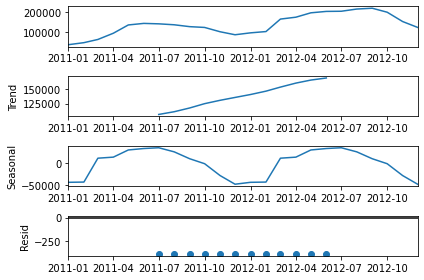

In [21]:
from matplotlib import pyplot
result = seasonal_decompose(bike_rental, model='additive')
result.plot()
%%pypylot.show()

In [22]:
df_reconstructed.dropna(axis=0,inplace=True)
df_reconstructed

,seas,trend,resid,actual_values
date,,,,
2011-07-01,35698.204861,106031.708333,-388.913194,141341.0
2011-08-01,26319.996528,110759.916667,-388.913194,136691.0
2011-09-01,10557.329861,117249.583333,-388.913194,127418.0
2011-10-01,-857.336806,124757.250000,-388.913194,123511.0
2011-11-01,-28009.586806,130565.500000,-388.913194,102167.0
2011-12-01,-47827.003472,135538.916667,-388.913194,87323.0
2012-01-01,-43472.003472,140604.916667,-388.913194,96744.0
2012-02-01,-42915.586806,146441.500000,-388.913194,103137.0
2012-03-01,11782.121528,153481.791667,-388.913194,164875.0


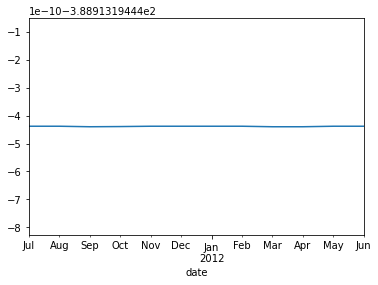

In [23]:
df_reconstructed.resid.plot()

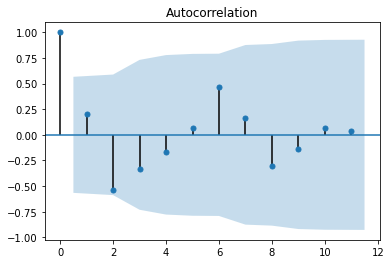

In [24]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_reconstructed.resid.values)
pyplot.show()

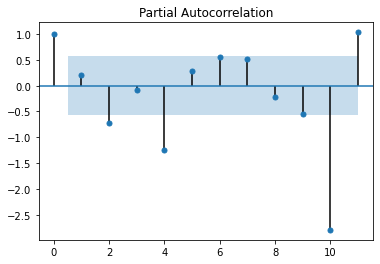

In [25]:
plot_pacf(df_reconstructed.resid, lags=20)
pyplot.show()

In [26]:
from statsmodels.tsa.stattools import adfuller, kpss


In [27]:
def adfuller_test(X):
    result=adfuller(X)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the Null-Hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against Null-Hypothesis(H0), time series has a unit root, indicating it is non-stationary ")

In [28]:
adfuller_test(df_reconstructed.resid)

ADF Test Statistic : -1.7394259269800016
p-value : 0.41092201130502565
#Lags Used : 4
Number of Observations Used : 7
Weak evidence against Null-Hypothesis(H0), time series has a unit root, indicating it is non-stationary 


In [29]:
train_data = bike_rental['2011-01-01':'2012-06-01']
test_data = bike_rental['2012-07-01':'2012-12-01']

In [30]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Counts   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -191.307
Method:                       css-mle   S.D. of innovations          18594.199
Date:                Tue, 28 Jul 2020   AIC                            390.614
Time:                        05:24:31   BIC                            393.947
Sample:                    02-01-2011   HQIC                           390.945
                         - 06-01-2012                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9637.6015   6998.835      1.377      0.169   -4079.862    2.34e+04
ar.L1.D.Counts     0.4725      0.366      1.290      0.197      -0.246       1.191
ma.L1.D.Counts    -0.1485      0.373     -0.399      0.690      -0.879       0.582
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1162           +0.0000j            2.1162            0.0000
MA.1            6.7323           +0.0000j            6.7323            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [34]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 4.0 for model SARIMAX(0, 0, 0)x(0, 1, 1, 12)


In [35]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [36]:
pred0 = results.get_prediction(start='2012-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

In [37]:
pred1 = results.get_prediction(start='2012-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [38]:
pred2 = results.get_forecast('2013-02-01')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2012-07-01':'2012-12-01'])

2012-07-01    141341.0
2012-08-01    136691.0
2012-09-01    127418.0
2012-10-01    123511.0
2012-11-01    102167.0
2012-12-01     87323.0
Freq: MS, dtype: float64


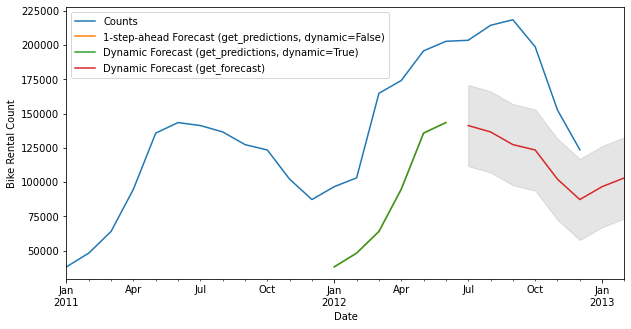

In [39]:
ax = bike_rental.plot(figsize=(10, 5))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Bike Rental Count')
plt.xlabel('Date')
plt.legend()
plt.show()

# REGRESSION

In [40]:
bike_rental = pd.read_csv("day.csv")

In [41]:
bike_rental.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
bike_rental['dteday'] = pd.to_datetime(bike_rental.dteday)

In [43]:
d1 = '2011-01-01'

In [44]:
d1 = pd.to_datetime(d1)

In [45]:
type(bike_rental.dteday[0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
type(d1)

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
#Extracting age of the company in months from dteday variable 
bike_rental['age'] = bike_rental.dteday.dt.year*12 + bike_rental.dteday.dt.month - \
                      (d1.year*12 + d1.month)

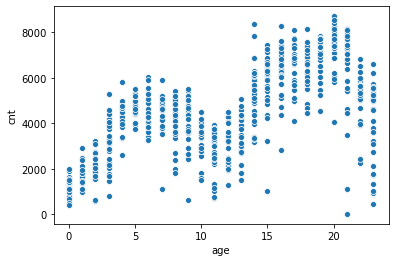

In [48]:
sns.scatterplot(x="age", y="cnt", data=bike_rental)

In [49]:
bike_rental = bike_rental.drop(["instant", "dteday", "casual", "registered"], axis=1)

In [50]:
bike_rental.tail(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114,23
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095,23
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341,23
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796,23
730,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,2729,23


# MISSING VALUE ANALYSIS

In [51]:
pd.DataFrame(bike_rental.isnull().sum())

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


**NO MISSING VALUES IN THE DATASET**

# OUTLIER ANALYSIS

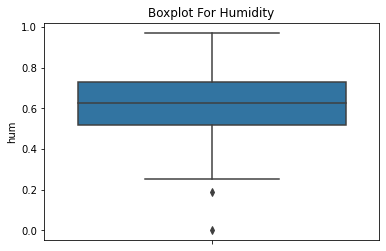

<Figure size 432x288 with 0 Axes>

In [52]:
sns.boxplot(y="hum", data=bike_rental)
plt.title('Boxplot For Humidity')
plt.show()
plt.savefig("humO.png")

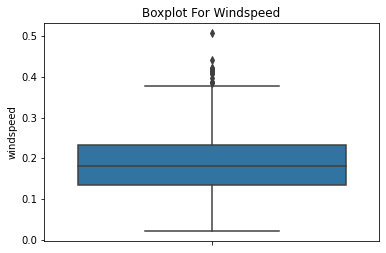

<Figure size 432x288 with 0 Axes>

In [53]:
sns.boxplot(y="windspeed", data=bike_rental)
plt.title('Boxplot For Windspeed')
plt.show()
plt.savefig("windspeedO.png")

In [54]:
bike_rental.shape

(731, 13)

In [55]:
outlier_names = ["hum", "windspeed"]

In [56]:
for i in outlier_names:
    print(i)
    q75, q25 = np.percentile(bike_rental.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    bike_rental.loc[bike_rental[i] < min, i] = np.nan
    bike_rental.loc[bike_rental[i] > max, i] = np.nan

hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


In [57]:
pd.DataFrame(bike_rental.isnull().sum())

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,2


In [58]:
bike_rental = bike_rental.dropna()

In [59]:
bike_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,age
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0


In [60]:
bike_rental.shape

(717, 13)

# FEATURE SELECTION 

**Pearson's Correlation Plot**

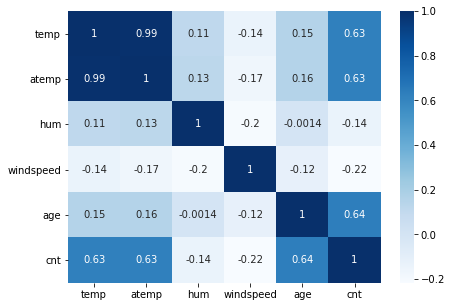

In [61]:
#Plotting heatmap 
plt.figure(figsize=(7,5))
sns.heatmap(bike_rental[['temp', 'atemp', 'hum','windspeed', 'age', 'cnt']].corr(), cmap='Blues', annot=True)

In [62]:
bike_rental = bike_rental.drop(['atemp'], axis=1)

In [63]:
bike_rental.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,age
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,0
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,0
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0


**Chi-Square Test of Independence**

If p-value <= 0.05: significant result, reject null hypothesis (H0), dependent.


If p-value > 0.05: not significant result, fail to reject null hypothesis (H0), independent.

In [64]:
cvar = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

In [65]:
cvar

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [66]:
df = pd.DataFrame()

In [67]:
for i in cvar:
    for j in cvar:
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_rental[i], bike_rental[j]))
            df = df.append({i : p}, ignore_index=True)

In [68]:
df = df.apply(lambda x: pd.Series(x.dropna().values)).fillna('')

In [69]:
df['names'] = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [70]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,names
0,0.000000,9.988045e-01,0.000000,6.405518e-01,1.000000e+00,9.463399e-01,0.013248,season
1,0.998805,4.442159e-157,1.000000,9.948241e-01,9.999605e-01,9.561017e-01,0.183250,yr
2,0.000000,1.000000e+00,0.000000,5.712387e-01,1.000000e+00,9.927346e-01,0.009828,mnth
3,0.640552,9.948241e-01,0.571239,2.156836e-150,5.970403e-11,3.657543e-11,0.598730,holiday
4,1.000000,9.999605e-01,1.000000,5.970403e-11,0.000000e+00,6.500488e-133,0.249038,weekday


In [71]:
df.set_index('names', inplace=True)

In [72]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
names,,,,,,,
season,0.000000,9.988045e-01,0.000000,6.405518e-01,1.000000e+00,9.463399e-01,0.013248
yr,0.998805,4.442159e-157,1.000000,9.948241e-01,9.999605e-01,9.561017e-01,0.183250
mnth,0.000000,1.000000e+00,0.000000,5.712387e-01,1.000000e+00,9.927346e-01,0.009828
holiday,0.640552,9.948241e-01,0.571239,2.156836e-150,5.970403e-11,3.657543e-11,0.598730
weekday,1.000000,9.999605e-01,1.000000,5.970403e-11,0.000000e+00,6.500488e-133,0.249038


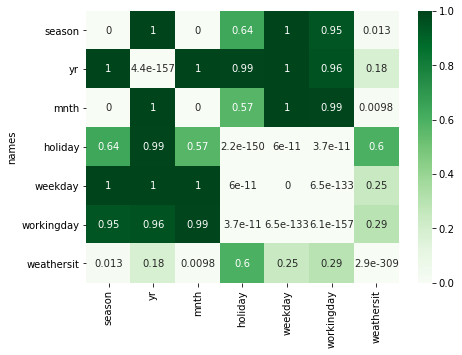

In [73]:
#Plotting heatmap for p-values from chi-squared tests
plt.figure(figsize=(7,5))
sns.heatmap(df, cmap="Greens", annot=True)

**season, month and weathersit are highly dependent**

**holiday, weekday and workingday are highly dependent on each other**

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=200)
X = bike_rental.drop(['cnt'],axis = 1)
y = bike_rental['cnt']
reg.fit(X, y)
imp_feat = pd.DataFrame({'Feature': bike_rental.drop(['cnt'],axis = 1).columns,
                         'importance':reg.feature_importances_})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,temp,0.256975
1,yr,0.238446
2,age,0.180138
3,season,0.117947
4,weathersit,0.061933
5,mnth,0.049587
6,hum,0.034804
7,windspeed,0.023354
8,weekday,0.018669
9,workingday,0.012207


In [76]:
bike_rental = bike_rental.drop(['mnth', 'holiday'],axis = 1)

In [77]:
bike_rental.head()

,season,yr,weekday,workingday,weathersit,temp,hum,windspeed,cnt,age
0,1,0,6,0,2,0.344167,0.805833,0.160446,985,0
1,1,0,0,0,2,0.363478,0.696087,0.248539,801,0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0
3,1,0,2,1,1,0.200000,0.590435,0.160296,1562,0
4,1,0,3,1,1,0.226957,0.436957,0.186900,1600,0


In [78]:
bike_rental = bike_rental[['season', 'yr', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'age', 'cnt']]

In [79]:
bike_rental.head(3)

,season,yr,weekday,workingday,weathersit,temp,hum,windspeed,age,cnt
0,1,0,6,0,2,0.344167,0.805833,0.160446,0,985
1,1,0,0,0,2,0.363478,0.696087,0.248539,0,801
2,1,0,1,1,1,0.196364,0.437273,0.248309,0,1349


In [80]:
cat = ['season', 'yr', 'weekday', 'workingday', 'weathersit']
bike_rental[cat] = bike_rental[cat].apply(lambda x: x.astype('category') )
num = ['temp','hum','windspeed', 'age', 'cnt']
bike_rental[num] = bike_rental[num].apply(lambda x: x.astype('float') )

In [81]:
outcome, predictors = dmatrices('cnt ~ + season + yr + weekday + workingday + weathersit + temp + hum + windspeed + age',bike_rental, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,64.068643,Intercept
1,2.833669,season[T.2]
2,5.934553,season[T.3]
3,4.929238,season[T.4]
4,11.688286,yr[T.1]
5,5.131975,weekday[T.1]
6,6.369954,weekday[T.2]
7,6.371789,weekday[T.3]
8,6.194917,weekday[T.4]
9,6.292548,weekday[T.5]


In [82]:
bike_rental = bike_rental.drop(['workingday', 'age'],axis = 1)

In [83]:
outcome, predictors = dmatrices('cnt ~ + season + yr + weekday + weathersit + temp + hum + windspeed',bike_rental, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,63.763459,Intercept
1,2.704580,season[T.2]
2,4.785553,season[T.3]
3,1.880710,season[T.4]
4,1.037349,yr[T.1]
5,1.712666,weekday[T.1]
6,1.727481,weekday[T.2]
7,1.735787,weekday[T.3]
8,1.715374,weekday[T.4]
9,1.730637,weekday[T.5]


In [84]:
bike_rental.head()

,season,yr,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,6,2,0.344167,0.805833,0.160446,985.0
1,1,0,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,2,1,0.200000,0.590435,0.160296,1562.0
4,1,0,3,1,0.226957,0.436957,0.186900,1600.0


# FEATURE SCALING

**Shapiro Test**

p <= 0.05: reject H0, not normal.

p > 0.05: fail to reject H0, normal.

In [85]:
num=['temp','hum','windspeed']

In [86]:
from scipy import stats

for i in num:
    shapiro_test = stats.shapiro(bike_rental[i])
    print(i)
    print(shapiro_test)

temp
(0.9643257260322571, 3.325623196964722e-12)
hum
(0.9937424659729004, 0.004474991001188755)
windspeed
(0.9807030558586121, 4.064008152226961e-08)


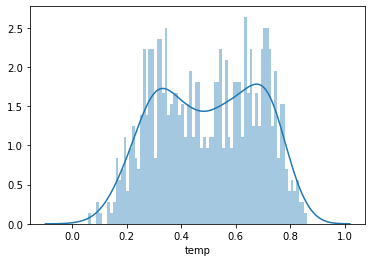

In [87]:
sns.distplot(bike_rental['temp'],bins =80)

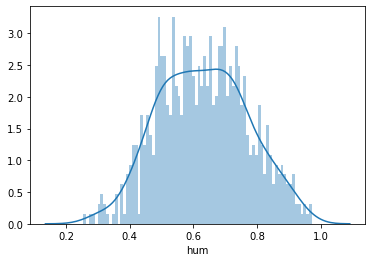

In [88]:
sns.distplot(bike_rental['hum'],bins =80)

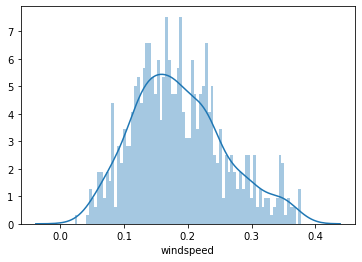

In [89]:
sns.distplot(bike_rental['windspeed'],bins =80)

In [90]:
bike_rental.head()

,season,yr,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,6,2,0.344167,0.805833,0.160446,985.0
1,1,0,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,2,1,0.200000,0.590435,0.160296,1562.0
4,1,0,3,1,0.226957,0.436957,0.186900,1600.0


In [91]:
for i in num:
    print(i)
    bike_rental[i] = (bike_rental[i] - (bike_rental[i].min()))/((bike_rental[i].max()) - (bike_rental[i].min()))

temp
hum
windspeed


In [92]:
bike_rental.head()

,season,yr,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,6,2,0.355170,0.767981,0.388102,985.0
1,1,0,0,2,0.379232,0.615202,0.635752,801.0
2,1,0,1,1,0.171000,0.254904,0.635105,1349.0
3,1,0,2,1,0.175530,0.468123,0.387681,1562.0
4,1,0,3,1,0.209120,0.254464,0.462471,1600.0


In [93]:
bike_rental.shape

(717, 8)

**One hot encoding**

In [94]:
cat_names = ['season', 'yr', 'weekday', 'weathersit']

for i in cat_names:
    temp = pd.get_dummies(bike_rental[i], prefix = i)
    bike_rental = bike_rental.join(temp)

In [95]:
bike_rental

,season,yr,weekday,weathersit,temp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,1,0,6,2,0.355170,0.767981,0.388102,985.0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,2,0.379232,0.615202,0.635752,801.0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,1,1,0.171000,0.254904,0.635105,1349.0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,2,1,0.175530,0.468123,0.387681,1562.0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,3,1,0.209120,0.254464,0.462471,1600.0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,4,2,0.243025,0.555105,0.921356,2114.0,1,0,...,0,0,0,0,1,0,0,0,1,0
727,1,1,5,2,0.241986,0.467517,0.374116,3095.0,1,0,...,0,0,0,0,0,1,0,0,1,0
728,1,1,6,2,0.241986,0.694316,0.286721,1341.0,1,0,...,0,0,0,0,0,0,1,0,1,0
729,1,1,0,1,0.245101,0.319025,0.923102,1796.0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [96]:
bike_rental = bike_rental.drop(['season', 'yr', 'weekday', 'weathersit'],axis = 1)

In [97]:
bike_rental.shape

(717, 20)

# MODEL DEVELOPMENT

**Reseting the index before test train split**

In [98]:
bike_rental.tail()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
726,0.243025,0.555105,0.921356,2114.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
727,0.241986,0.467517,0.374116,3095.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
728,0.241986,0.694316,0.286721,1341.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
729,0.245101,0.319025,0.923102,1796.0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
730,0.195259,0.450116,0.372359,2729.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [99]:
bike_rental = bike_rental.reset_index()

In [100]:
bike_rental = bike_rental.drop(['index'], axis=1)

In [101]:
bike_rental.tail()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
712,0.243025,0.555105,0.921356,2114.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
713,0.241986,0.467517,0.374116,3095.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
714,0.241986,0.694316,0.286721,1341.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
715,0.245101,0.319025,0.923102,1796.0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
716,0.195259,0.450116,0.372359,2729.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [102]:
bike_rental.shape

(717, 20)

In [103]:
X = bike_rental.drop(columns=['cnt'])
y = bike_rental['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [104]:
#For Evaluation
def scores(y, y_):
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X.shape[1]-1)))
    print('r square  ', metrics.r2_score(y, y_))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))

**Linear Regression**

In [105]:
from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()

In [106]:
regressor_LR.fit(X_train, y_train)

LinearRegression()

In [107]:
predictions_LR = regressor_LR.predict(X_test)

In [108]:
scores(y_test, predictions_LR)

Adjusted r square:0.8437187497413461
r square   0.8644833913841043
MAPE:17.063097803313067


**RIDGE**

In [109]:
from sklearn.linear_model import Ridge
regressor_Ridge = Ridge()

In [110]:
regressor_Ridge.fit(X_train, y_train)

Ridge()

In [111]:
predictions_Ridge = regressor_Ridge.predict(X_test)

In [112]:
scores(y_test, predictions_Ridge)

Adjusted r square:0.8417658600785782
r square   0.8627899765716343
MAPE:17.18327381240189


**Lasso**

In [113]:
from sklearn.linear_model import Lasso
regressor_Lasso = Lasso()

In [114]:
regressor_Lasso.fit(X_train, y_train)

Lasso()

In [115]:
predictions_Lasso = regressor_Lasso.predict(X_test)

In [116]:
scores(y_test, predictions_Lasso)

Adjusted r square:0.84337456870546
r square   0.8641849406956437
MAPE:17.077015467744737


**Decison Tree**

In [117]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor()

In [118]:
regressor_DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [119]:
predictions_DT = regressor_DT.predict(X_test)

In [120]:
scores(y_test, predictions_DT)

Adjusted r square:0.8420343527043238
r square   0.8630227953520011
MAPE:19.59551790757262


**Random Forest**

In [121]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor()

In [122]:
regressor_RF.fit(X_train, y_train)

RandomForestRegressor()

In [123]:
predictions_RF = regressor_RF.predict(X_test)

In [124]:
scores(y_test, predictions_RF)

Adjusted r square:0.9045051083677855
r square   0.9171932408224154
MAPE:15.85987110983761


**XGB Regressor**

In [125]:
from xgboost import XGBRegressor
regressor_XGB = XGBRegressor()

In [126]:
regressor_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
predictions_XGB = regressor_Lasso.predict(X_test)

In [128]:
scores(y_test, predictions_XGB)

Adjusted r square:0.84337456870546
r square   0.8641849406956437
MAPE:17.077015467744737


# HYPERPARAMETER TUNING 

In [129]:
from sklearn.model_selection import RandomizedSearchCV

In [130]:
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_split':range(2,5,1), 
               'min_samples_leaf':range(1, 2, 4),
               'min_samples_split':(2, 5, 10)}

In [131]:
rf_random = RandomizedSearchCV(estimator = regressor_RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [132]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': range(1, 2, 4),
                                        'min_samples_split': (2, 5, 10),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [133]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=100, n_estimators=600)

In [134]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 100}

**Random Forest with Hyperparameter tuning**

In [135]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(max_depth= 100, min_samples_split=2,n_estimators=600, min_samples_leaf=1)

In [136]:
regressor_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=600)

In [137]:
predictions_RF = regressor_RF.predict(X_test)

In [138]:
#With Tuning 
scores(y_test, predictions_RF)

Adjusted r square:0.9045986908501057
r square   0.9172743892686231
MAPE:16.04063372899455


# **Cross-Validation**

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
cross_val_score(regressor_RF, X_train, y_train, cv=10, scoring='r2')

array([0.86797413, 0.85468406, 0.76488008, 0.8089187 , 0.90690739,
       0.80856092, 0.90942179, 0.84443993, 0.89927236, 0.85787768])

In [142]:
cross_val_score(regressor_RF, X_train, y_train, cv=10, scoring='r2').mean()

0.8515034977465843